# Development and validation of machine learning models for predicting hospital readmission in heart failure patients.

In [1]:
import csv


C:\Users\potab\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


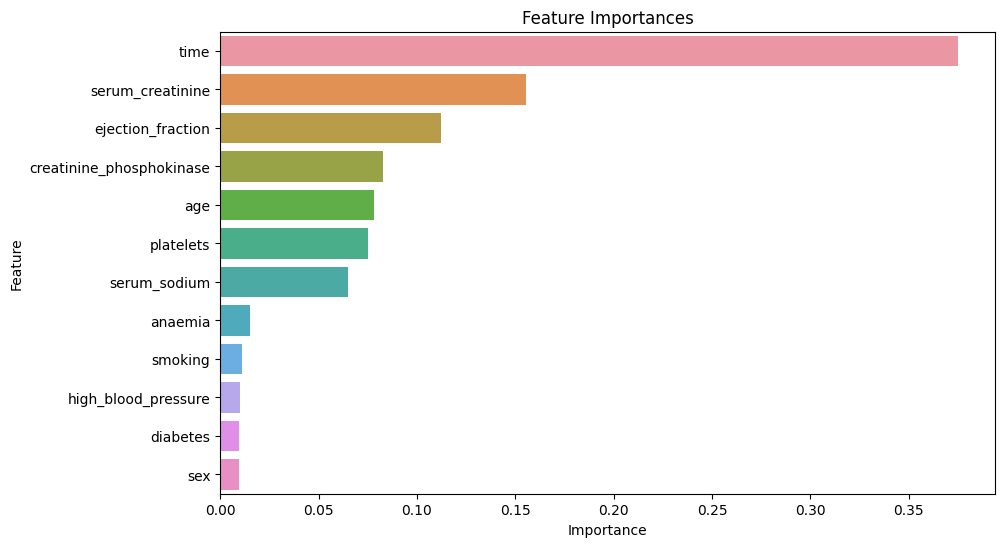

Top 4 features: ['time', 'serum_creatinine', 'ejection_fraction', 'creatinine_phosphokinase']
Logistic Regression - Accuracy: 0.8, Precision: 0.8823529411764706, Recall: 0.6, AUC-ROC: 0.7714285714285715
Random Forest - Accuracy: 0.7, Precision: 0.6842105263157895, Recall: 0.52, AUC-ROC: 0.6742857142857143
Gradient Boosting - Accuracy: 0.7, Precision: 0.7058823529411765, Recall: 0.48, AUC-ROC: 0.6685714285714286


C:\Users\potab\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.5823 - loss: 0.6674 - val_accuracy: 0.8125 - val_loss: 0.6414
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5814 - loss: 0.6754 - val_accuracy: 0.8542 - val_loss: 0.6099
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6675 - loss: 0.6247 - val_accuracy: 0.8333 - val_loss: 0.5764
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7623 - loss: 0.5839 - val_accuracy: 0.8542 - val_loss: 0.5428
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7321 - loss: 0.5691 - val_accuracy: 0.8542 - val_loss: 0.5129
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7677 - loss: 0.5498 - val_accuracy: 0.8542 - val_loss: 0.4855
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7400 - loss: 0.5377 - val_accuracy: 0.8750 - val_loss: 0.4598
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7454 - loss: 0.5239 - val_accuracy: 0.8542 - val_loss

Epoch 52/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8282 - loss: 0.3382 - val_accuracy: 0.8542 - val_loss: 0.3018
Epoch 53/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8867 - loss: 0.3148 - val_accuracy: 0.8542 - val_loss: 0.3036
Epoch 54/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7551 - loss: 0.4562 - val_accuracy: 0.8542 - val_loss: 0.3070
Epoch 55/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8504 - loss: 0.3143 - val_accuracy: 0.8542 - val_loss: 0.3059
Epoch 56/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8613 - loss: 0.3396 - val_accuracy: 0.8542 - val_loss: 0.3071
Epoch 57/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8310 - loss: 0.3270 - val_accuracy: 0.8542 - val_loss: 0.3095
Epoch 58/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8816 - loss: 0.2996 - val_accuracy: 0.8542 - val_loss: 0.3121
Epoch 59/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8533 - loss: 0.3366 - val_accuracy: 0.8542 - v

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

# Rename columns to match the image
data.columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
                'smoking', 'time', 'DEATH_EVENT']

# Splitting the data
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()

# Select top 4 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(4)['Feature']
print("Top 4 features:", top_features.tolist())
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale the selected features
scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_top_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_top_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_auc_roc = roc_auc_score(y_test, log_reg_pred)
print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, AUC-ROC: {log_reg_auc_roc}")

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_top_scaled, y_train)
rf_clf_pred = rf_clf.predict(X_test_top_scaled)
rf_accuracy = accuracy_score(y_test, rf_clf_pred)
rf_precision = precision_score(y_test, rf_clf_pred)
rf_recall = recall_score(y_test, rf_clf_pred)
rf_auc_roc = roc_auc_score(y_test, rf_clf_pred)
print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, AUC-ROC: {rf_auc_roc}")

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train_top_scaled, y_train)
gb_clf_pred = gb_clf.predict(X_test_top_scaled)
gb_accuracy = accuracy_score(y_test, gb_clf_pred)
gb_precision = precision_score(y_test, gb_clf_pred)
gb_recall = recall_score(y_test, gb_clf_pred)
gb_auc_roc = roc_auc_score(y_test, gb_clf_pred)
print(f"Gradient Boosting - Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, AUC-ROC: {gb_auc_roc}")

# Enhanced Neural Network
model = Sequential([
    Dense(128, input_shape=(X_train_top_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_top_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
loss, accuracy = model.evaluate(X_test_top_scaled, y_test, verbose=1)
y_pred = (model.predict(X_test_top_scaled) > 0.5).astype("int32")
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_auc_roc = roc_auc_score(y_test, y_pred)
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")

# Summarize results
print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, AUC-ROC: {log_reg_auc_roc}")
print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, AUC-ROC: {rf_auc_roc}")
print(f"Gradient Boosting - Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, AUC-ROC: {gb_auc_roc}")
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")


# hyperparameter tuning to improve accuracy


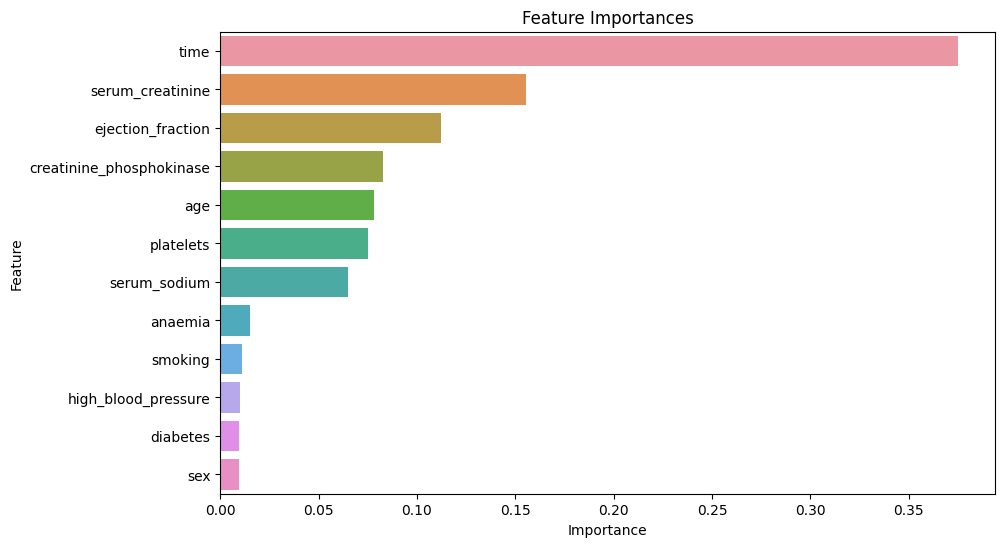

Top 4 features: ['time', 'serum_creatinine', 'ejection_fraction', 'creatinine_phosphokinase']
Logistic_Regression - Accuracy: 0.8, Precision: 0.8823529411764706, Recall: 0.6, AUC-ROC: 0.7714285714285715
Random_Forest - Accuracy: 0.7166666666666667, Precision: 0.7, Recall: 0.56, AUC-ROC: 0.6942857142857143
Gradient_Boosting - Accuracy: 0.7166666666666667, Precision: 0.7222222222222222, Recall: 0.52, AUC-ROC: 0.6885714285714286
Epoch 1/100


C:\Users\potab\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.4763 - loss: 0.7168 - val_accuracy: 0.7708 - val_loss: 0.6707
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5546 - loss: 0.7031 - val_accuracy: 0.7708 - val_loss: 0.6433
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6678 - loss: 0.6531 - val_accuracy: 0.7708 - val_loss: 0.6181
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6966 - loss: 0.6313 - val_accuracy: 0.7500 - val_loss: 0.5918
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7821 - loss: 0.5740 - val_accuracy: 0.8125 - val_loss: 0.5624
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7633 - loss: 0.5881 - val_accuracy: 0.8333 - val_loss: 0.5307
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7219 - loss: 0.5716 - val_accuracy: 0.8333 - val_loss: 0.4992
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7359 - loss: 0.5507 - val_accuracy: 0.8333 - val_loss: 0.4699
Epo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8373 - loss: 0.3843 - val_accuracy: 0.8542 - val_loss: 0.3004
Epoch 53/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8155 - loss: 0.3319 - val_accuracy: 0.8750 - val_loss: 0.2971
Epoch 54/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8309 - loss: 0.3226 - val_accuracy: 0.8750 - val_loss: 0.2955
Epoch 55/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8815 - loss: 0.2783 - val_accuracy: 0.8750 - val_loss: 0.2962
Epoch 56/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8965 - loss: 0.2948 - val_accuracy: 0.8542 - val_loss: 0.2998
Epoch 57/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8447 - loss: 0.3217 - val_accuracy: 0.8542 - val_loss: 0.3008
Epoch 58/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8533 - loss: 0.3491 - val_accuracy: 0.8542 - val_loss: 0.3001
Epoch 59/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8500 - loss: 0.3554 - val_accuracy: 0.8542 - val_loss: 0.30

Neural Network - Accuracy: 0.75, Precision: 0.7272727272727273, Recall: 0.64, AUC-ROC: 0.7342857142857142


NameError: name 'precision' is not defined

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
import joblib

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

# Rename columns to match the image
data.columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
                'smoking', 'time', 'DEATH_EVENT']

# Splitting the data
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()

# Select top 4 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(4)['Feature']
print("Top 4 features:", top_features.tolist())
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale the selected features
scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# Function to evaluate and save model
def evaluate_and_save_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    auc_roc = roc_auc_score(y_test, predictions)
    joblib.dump(model, f'{model_name}.joblib')
    print(f"{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")

# Logistic Regression with hyperparameter tuning
log_reg = LogisticRegression(random_state=42)
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
evaluate_and_save_model(grid_search, X_train_top_scaled, y_train, X_test_top_scaled, y_test, 'Logistic_Regression')

# Random Forest with hyperparameter tuning
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
evaluate_and_save_model(grid_search, X_train_top_scaled, y_train, X_test_top_scaled, y_test, 'Random_Forest')

# Gradient Boosting with hyperparameter tuning
gb_clf = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')
evaluate_and_save_model(grid_search, X_train_top_scaled, y_train, X_test_top_scaled, y_test, 'Gradient_Boosting')

# Enhanced Neural Network
model = Sequential([
    Dense(128, input_shape=(X_train_top_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_top_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
loss, accuracy = model.evaluate(X_test_top_scaled, y_test, verbose=1)
y_pred = (model.predict(X_test_top_scaled) > 0.5).astype("int32")
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_auc_roc = roc_auc_score(y_test, y_pred)
model.save('Neural_Network.h5')
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")

# Summarize results
print(f"Logistic Regression - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")
print(f"Random Forest - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")
print(f"Gradient Boosting - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")
